### TTim example of pumping test analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

Load data of two observation wells

In [2]:
drawdown = np.loadtxt("data/oudekorendijk_h30.dat")
to1 = drawdown[:, 0] / 60 / 24
ho1 = -drawdown[:, 1]
ro1 = 30

drawdown = np.loadtxt("data/oudekorendijk_h90.dat")
to2 = drawdown[:, 0] / 60 / 24
ho2 = -drawdown[:, 1]
ro2 = 90

Pumping discharge

In [3]:
Qo = 788

Create model

In [4]:
ml = ttim.ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = ttim.Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


Create calibration object, add parameters and first series. Fit the model. The chi-square value is the mean of the squared residuals at the optimum.

In [ ]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-4)
cal.series(name="obs1", x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=True)
display(cal.parameters)
print("rmse:", cal.rmse())
print("mse:", cal.rmse() ** 2 * len(ho1))
h1a = ml.head(ro1, 0, to1, 0)  # simulated head
h2a = ml.head(ro2, 0, to2, 0)  # simulated head

.............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03407764
    reduced chi-square = 0.00106493
    Akaike info crit   = -230.786125
    Bayesian info crit = -227.733404
[[Variables]]
    kaq0:  68.6397781 +/- 1.43819389 (2.10%) (init = 10)
    Saq0:  1.6071e-05 +/- 1.5821e-06 (9.84%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.8911


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0,68.639778,1.438194,2.095278,-inf,inf,10.0000,None,[68.63977808683588]
Saq0,0,0.000016,0.000002,9.844552,-inf,inf,0.0001,None,[1.6070725906739134e-05]


rmse: 0.03165886326970302
mse: 0.03407764320001153


In [ ]:
# second observation well
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=50)
cal.set_parameter(name="Saq0", layers=0, initial=1.5e-5)
cal.series(name="obs1", x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0)  # simulated head
h2b = ml.head(ro2, 0, to2, 0)  # simulated head

...........................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0,71.582508,1.573948,2.198788,-inf,inf,50.000000,None,[71.58250776201425]
Saq0,0,0.000029,0.000002,6.657477,-inf,inf,0.000015,None,[2.910696154564766e-05]


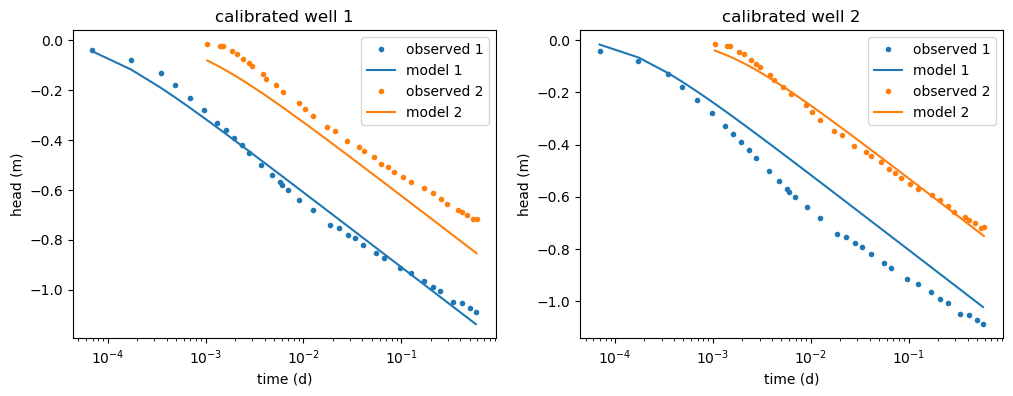

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1a[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2a[0], "C1", label="model 2")
plt.title("calibrated well 1")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1b[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2b[0], "C1", label="model 2")
plt.title("calibrated well 2")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()

### Add wellbore storage

In [8]:
ml = ttim.ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = ttim.Well(ml, xw=0, yw=0, rw=0.1, rc=0.2, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


In [ ]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-5)
cal.set_parameter_by_reference(
    name="rc", parameter=w.rc[:], initial=0.2, pmin=0.01, pmax=1
)
cal.series(name="obs1", x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=False)
display(cal.parameters)
h1a = ml.head(ro1, 0, to1, 0)  # simulated head
h2a = ml.head(ro2, 0, to2, 0)  # simulated head

.........................................................................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0.0,80.885785,1.762460e+00,2.178949,-inf,inf,10.00000,None,[80.88578535944654]
Saq0,0.0,0.000005,8.132813e-07,14.821462,-inf,inf,0.00001,None,[5.487186538964417e-06]
rc,NaN,0.289105,1.712457e-02,5.923309,0.01,1.0,0.20000,NaN,[0.28910484355420685]


In [ ]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-5)
cal.set_parameter_by_reference(
    name="rc", parameter=w.rc[:], initial=0.2, pmin=0.01, pmax=1
)
cal.series(name="obs2", x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0)  # simulated head
h2b = ml.head(ro2, 0, to2, 0)  # simulated head

...............................................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0.0,88.157077,1.424360e+00,1.615707,-inf,inf,10.00000,None,[88.15707730894232]
Saq0,0.0,0.000011,9.102215e-07,7.937427,-inf,inf,0.00001,None,[1.1467462400248175e-05]
rc,NaN,0.640535,2.819259e-02,4.401411,0.01,1.0,0.20000,NaN,[0.6405352403761851]


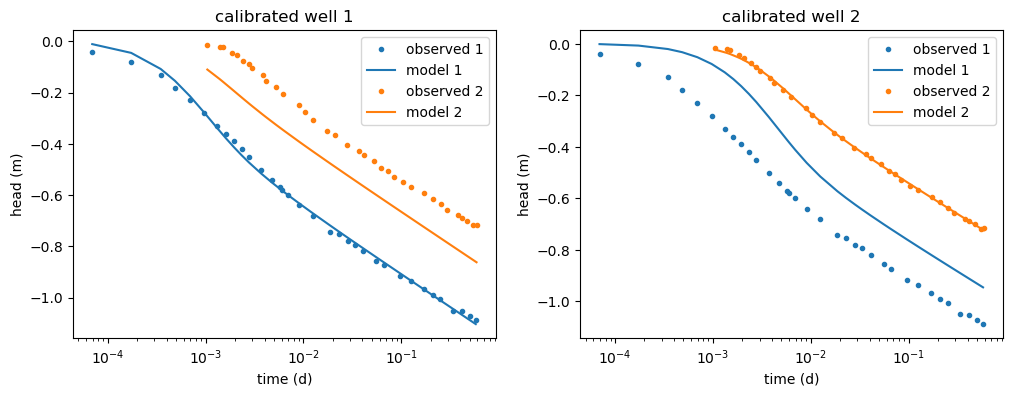

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1a[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2a[0], "C1", label="model 2")
plt.title("calibrated well 1")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1b[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2b[0], "C1", label="model 2")
plt.title("calibrated well 2")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()

### Two observation wells simultaneously

In [ ]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-5)
cal.set_parameter_by_reference(
    name="rc", parameter=w.rc[:], initial=0.2, pmin=0.01, pmax=1
)
cal.series(name="obs1", x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.series(name="obs2", x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)

........................................................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0.0,66.097223,1.833546,2.774014,-inf,inf,10.00000,None,[66.09722341978134]
Saq0,0.0,0.000025,0.000003,11.149376,-inf,inf,0.00001,None,[2.53936862364251e-05]
rc,NaN,0.010011,2.747456,27444.794888,0.01,1.0,0.20000,NaN,[0.01001084387393528]


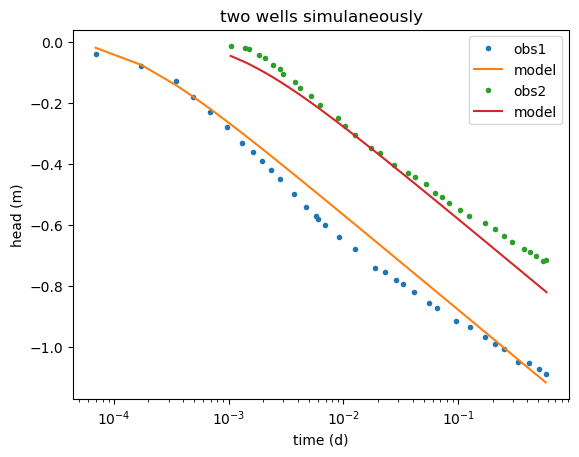

In [13]:
h1 = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, ".", label="obs1")
plt.semilogx(to1, h1[0], label="model")
h2 = ml.head(ro2, 0, to2, 0)
plt.semilogx(to2, ho2, ".", label="obs2")
plt.semilogx(to2, h2[0], label="model")
plt.title("two wells simulaneously")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()